\newpage

## Question 1

\color{black}
####(a)
visib: Mean visibility for the day in miles to tenths. Missing = 999.9
fog :Indicators (1 = yes, 0 = no/not reported) for the occurrence during the day


In [12]:
### (b)

import pandas as pd

df = pd.read_csv('https://gist.githubusercontent.com/krisrs1128/3845514e2d5eef57ec3271ea20fdcdb1/raw/44f9860df64b280e6b4c155f144c67bea1825edd/noaa-gosd.csv')
df = pd.DataFrame(data)

visib_dtype = df['visib'].dtype
fog_dtype = df['fog'].dtype

print(f"The data type of 'visib' is: {visib_dtype}")
print(f"The data type of 'fog' is: {fog_dtype}")

The data type of 'visib' is: float64
The data type of 'fog' is: int64


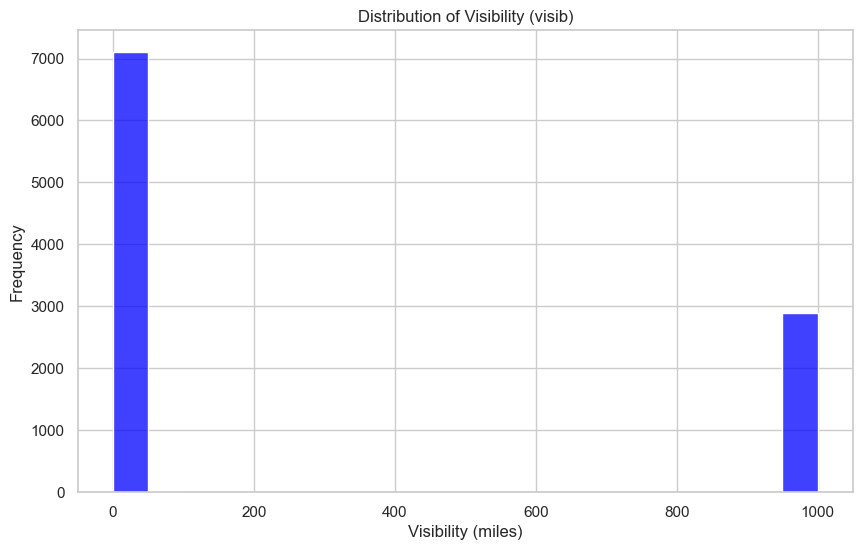

/var/folders/sx/00v4vsfs2vs4gnsz544px2s80000gn/T/ipykernel_68373/3946260079.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fog', data=df, palette='viridis')


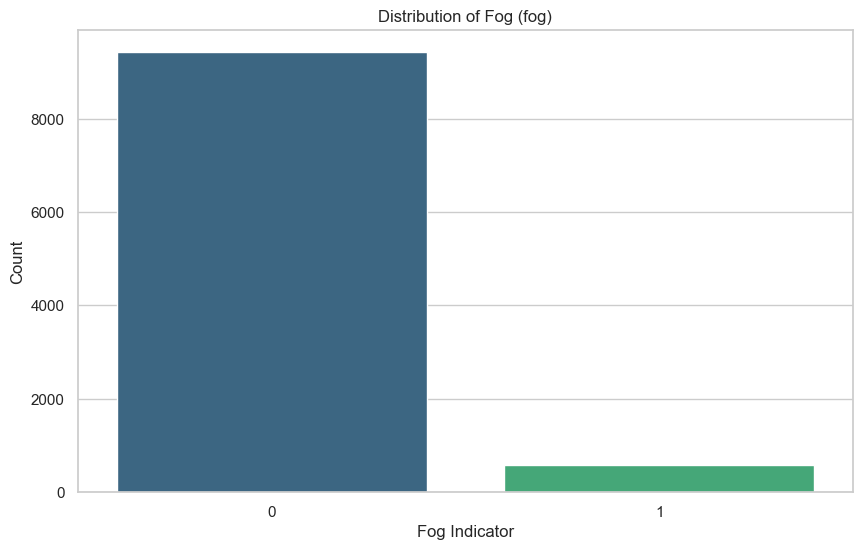

In [105]:
##c
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://gist.githubusercontent.com/krisrs1128/3845514e2d5eef57ec3271ea20fdcdb1/raw/44f9860df64b280e6b4c155f144c67bea1825edd/noaa-gosd.csv')

# Plot the distribution of 'visib'
plt.figure(figsize=(10, 6))
sns.histplot(df['visib'], bins=20, color='blue')
plt.title('Distribution of Visibility (visib)')
plt.xlabel('Visibility (miles)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of 'fog'
plt.figure(figsize=(10, 6))
sns.countplot(x='fog', data=df, palette='viridis')
plt.title('Distribution of Fog (fog)')
plt.xlabel('Fog Indicator')
plt.ylabel('Count')
plt.show()

visib: The distribution is distorted by missing values (999.9) and there are many cases of extremely low visibility. If the missing values are handled, it might likely show a right-skewed distribution centered around lower visibility values.
fog: The dataset is highly imbalanced, with fog being extremely rare. The imbalance might be challenging when we use as predictive model,further weight adjusting or more analysis need to be done.

In [107]:
##d

df['visib'].replace(999.9, pd.NA, inplace=True) 

/var/folders/sx/00v4vsfs2vs4gnsz544px2s80000gn/T/ipykernel_68373/999637524.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['visib'].replace(999.9, pd.NA, inplace=True)


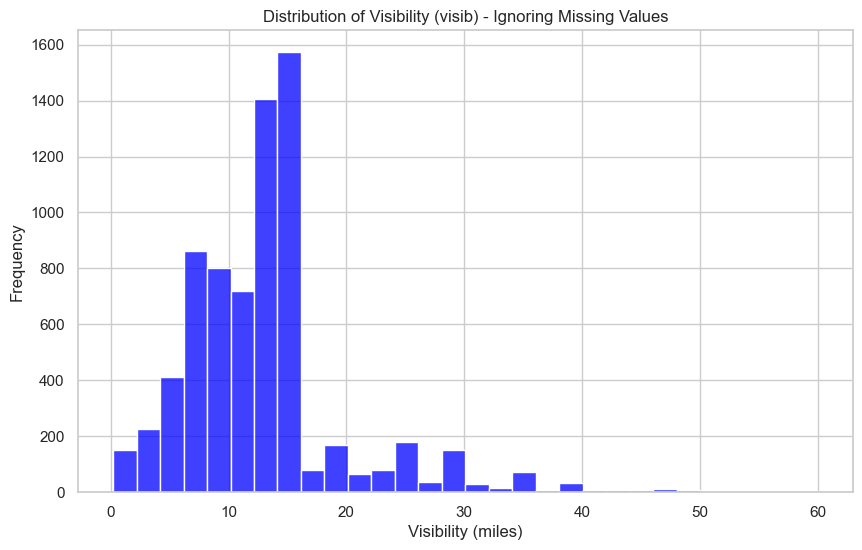

/var/folders/sx/00v4vsfs2vs4gnsz544px2s80000gn/T/ipykernel_68373/999637524.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fog', data=df_clean, palette='viridis')


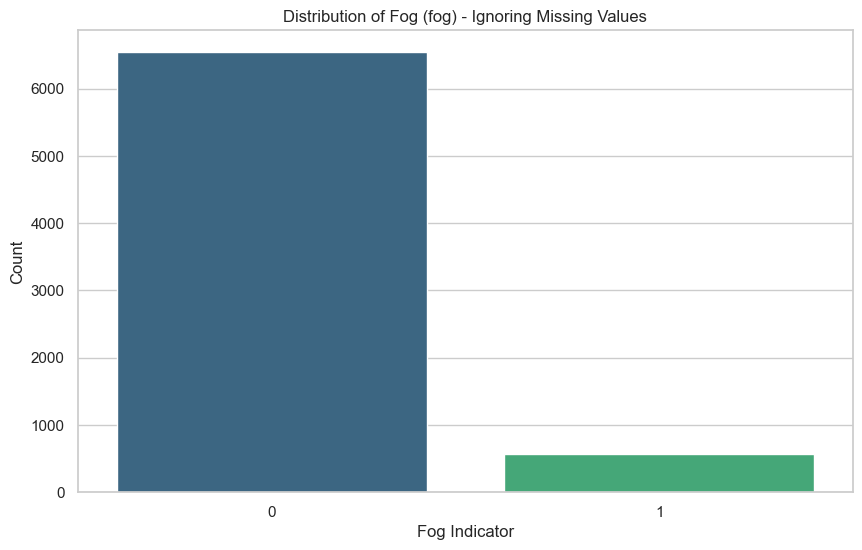

In [106]:
##e
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://gist.githubusercontent.com/krisrs1128/3845514e2d5eef57ec3271ea20fdcdb1/raw/44f9860df64b280e6b4c155f144c67bea1825edd/noaa-gosd.csv')

# Replace missing values for 'visib' (999.9) with NaN
df['visib'].replace(999.9, pd.NA, inplace=True)

# Drop rows with missing values in 'visib' and 'fog'
df_clean = df.dropna(subset=['visib', 'fog'])

# Plot the distribution of 'visib' ignoring missing values
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['visib'], bins=30, color='blue')
plt.title('Distribution of Visibility (visib) - Ignoring Missing Values')
plt.xlabel('Visibility (miles)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of 'fog' ignoring missing values
plt.figure(figsize=(10, 6))
sns.countplot(x='fog', data=df_clean, palette='viridis')
plt.title('Distribution of Fog (fog) - Ignoring Missing Values')
plt.xlabel('Fog Indicator')
plt.ylabel('Count')
plt.show()

##e
visib range from 0-60 miles approximately. Most lies in between 10-15 miles. This would be a typical visibility under normal weather conditions. The distribution of visib is right skewed, only fewer higher visibilities. After replacing the missing values with NaN, the distribution at around 1000 is no longer showed, which give us a more accurate representation.

The data of fog is extremely imbalanced, the majority of values fall to the category 0, which indicate no fog. (the fog is binary variable with values of 0and 1 , 0 means no fog and 1 means fog). we need more analysis or weight-adjusting for future predictive modelling.

\newpage

## Question 2


In [80]:
##(a)
# Import library
import pandas as pd
spotify = pd.read_csv('SpotifyFeatures.csv')

num_observations, num_variables = spotify.shape

print(f"The dataset has {num_observations} observations and {num_variables} variables.")

The dataset has 232725 observations and 18 variables.


In [21]:
##（b) check if its unique by creating loop
is_unique = spotify['track_id'].is_unique
print(f"Is 'track_id' unique for each observation? {is_unique}")

num_duplicates = spotify['track_id'].duplicated().sum()
print(f"Number of duplicate 'track_id' entries: {num_duplicates}")

## Remove duplicate 'track_id' 
spotify = spotify.drop_duplicates(subset='track_id', keep='first')

# Verify the number of observations after removing duplicates

spotify['track_id'].is_unique


Is 'track_id' unique for each observation? False
Number of duplicate 'track_id' entries: 55951


True

In [108]:
##c 
spotify.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

Categorical Variables (object type)
Variables: genre, artist_name, track_name, track_id, key, mode, time_signature
These variables represent non-numeric, categorical data such as names, categories, or identifiers. They are used for grouping, filtering, and classification tasks in data analysis. for example： genre indicates the music category (e.g., Pop, Rock). artist_name represents the name of the artist. track_id: Unique identifier for tracks, not used in numerical computations. 
Continuous Numeric Variables (float64 type)
Variables: acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence
These variables are continuous numerical scores typically ranging between 0 and 1, representing various characteristics of a song. They are used in numerical computations, such as correlations, visualizations (e.g., scatter plots), and predictive modeling. For examples: acousticness measures the acoustic nature of the track. danceability indicates how suitable a track is for dancing. tempo represents the beats per minute of the track. 
Discrete Numeric Variables (int64 type)
Variables: popularity, duration_ms
These variables are numeric but represent discrete counts or scores, which are good for statistical summaries, rankings, and analyses involving integer operations. For example, popularity is integer score indicating the track's popularity. duration_ms is duration of the track in milliseconds.


In [23]:
##d
spotify['genre'].nunique()

27

In [71]:
##e
genre_popularity_avg = spotify.groupby('genre')['popularity'].mean()
sorted_genres = genre_popularity_avg.sort_values(ascending=False)
top_five_genres = sorted_genres.head(5)
print(top_five_genres)

top_five_genres.index

subset_df = spotify[spotify['genre'].isin(top_five_genres.index)]
subset_df.shape

genre
Pop        66.590667
Rap        60.533795
Rock       59.619392
Hip-Hop    58.423131
Dance      57.275256
Name: popularity, dtype: float64


(45886, 18)

The five most popular genres are: ['Pop', 'Rap', 'Rock', 'Hip-Hop', 'Dance']


/var/folders/sx/00v4vsfs2vs4gnsz544px2s80000gn/T/ipykernel_68373/3172854147.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts_top_five.values, y=genre_counts_top_five.index, palette='viridis')


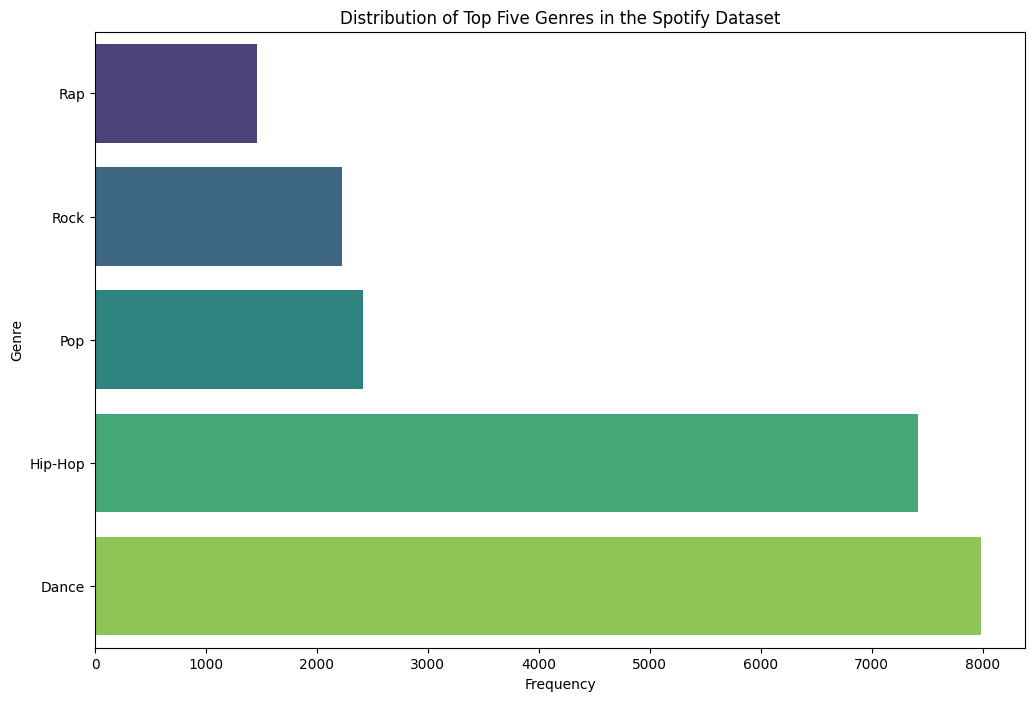

In [34]:
##f

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

spotify = pd.read_csv('SpotifyFeatures.csv')

spotify_cleaned = spotify.drop_duplicates(subset='track_id')

# Calculate the average popularity for genre
average_popularity = spotify_cleaned.groupby('genre')['popularity'].mean().sort_values(ascending=False)

# Identify the five most popular genres
top_five_genres = average_popularity.head(5).index.tolist()
print(f"The five most popular genres are: {top_five_genres}")

# Select all tracks associated with these top five genres
top_five_genres_tracks = spotify_cleaned[spotify_cleaned['genre'].isin(top_five_genres)]

# Visualize the distribution of genres for the top five genres
genre_counts_top_five = top_five_genres_tracks['genre'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts_top_five.values, y=genre_counts_top_five.index, palette='viridis')
plt.title('Distribution of Top Five Genres in the Spotify Dataset')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.show()

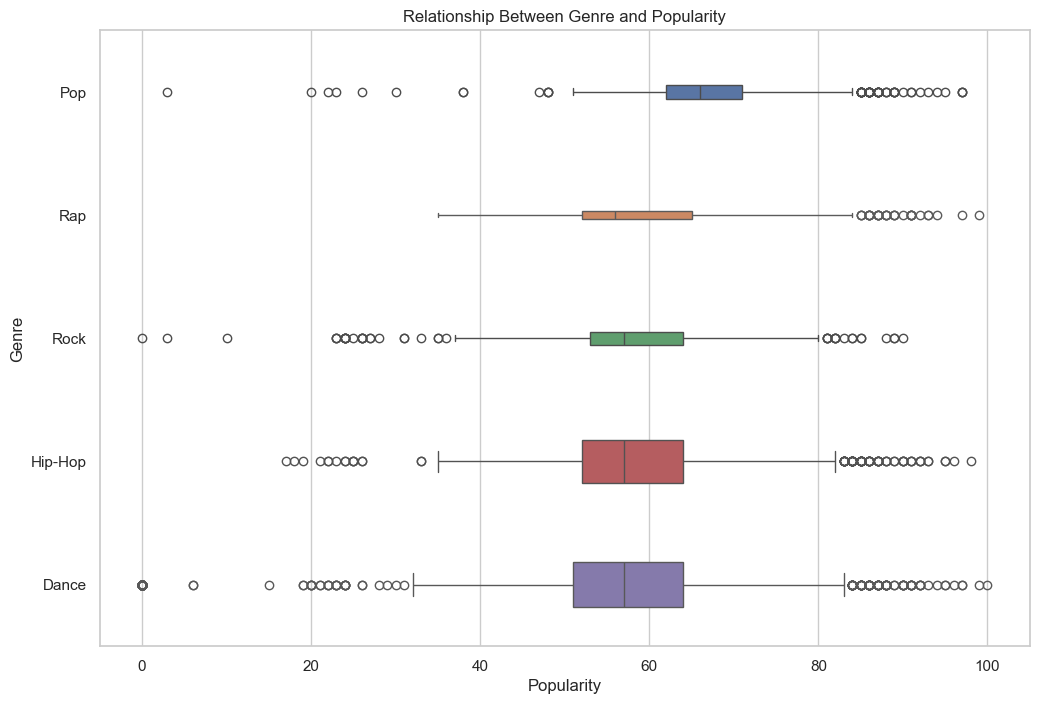

In [87]:
##g

# Compute the number of tracks in each genre
genre_counts = top_five_genres_tracks['genre'].value_counts()

# Calculate the relative frequency of each genre
relative_frequency = genre_counts / len(top_five_genres_tracks)

# Create a boxplot with widths proportional to the relative frequency
plt.figure(figsize=(12, 8))

# Plot each genre separately with adjusted widths
for genre in top_five_genres:
    genre_data = top_five_genres_tracks[top_five_genres_tracks['genre'] == genre]
    sns.boxplot(x='popularity', y='genre', data=genre_data, width=relative_frequency[genre])

plt.title('Relationship Between Genre and Popularity')
plt.xlabel('Popularity')
plt.ylabel('Genre')
plt.show()


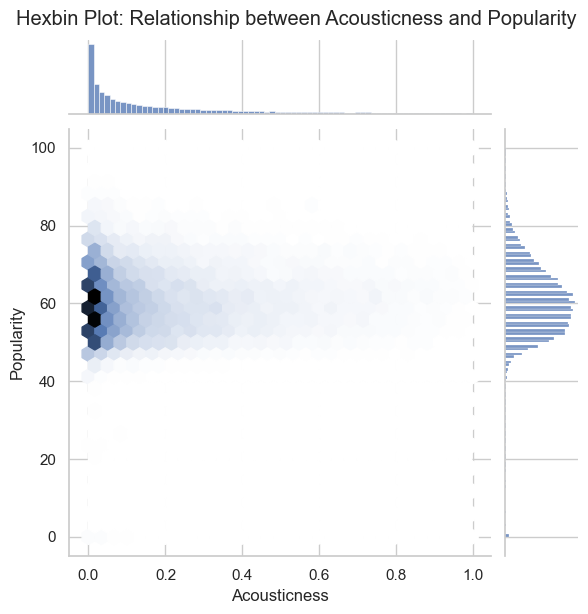

In [83]:
##h
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

hexbin_plot = sns.jointplot(
    x='acousticness', 
    y='popularity', 
    data=subset_df, 
    kind='hex', 
    gridsize=30
)

hexbin_plot.set_axis_labels('Acousticness', 'Popularity', fontsize=12)

hexbin_plot.fig.suptitle(
    'Hexbin Plot: Relationship between Acousticness and Popularity', 
    y=1.02
)

plt.show()


The hexbin plot indicates a inverse relationship between popularity and acousticness. Tracks with low acousticness (close to 0) tend to be more popular, with a dense concentration around a popularity score of 60. In contrast, tracks with higher acousticness (closer to 1) are less common and generally less popular.

\newpage

## Grading scheme 

\begin{table}[H]
\begin{tabular}{p{0.15\textwidth} p{0.15\textwidth} p{0.65\textwidth}}
1. & a. & [2]\\
   & b. & [2]\\
   & c. & [4] 2 for two plot and 2 for interpretation\\
   & d. & [1]\\
   & e. & [1] 1 for interpretation\\
2. & a. & [1]\\
   & b. & [1]\\
   & c. & [1] grouped types of variables to describe\\
   & d. & [1]\\
   & e. & [1]\\
   & f. & [3] 2 for correct plot and order genre and 1 for interpretation \\
   & g. & [3] 2 for correct plot and formatting\\
   & h. & [3] 2 for correct plot and formatting\\
References & & Reference list starts in a new page, references are appropriate [1] - Copilot use or not \\
Workflow & & Python codes and the outputs for the questions are presented, workflow is readable and free of assignment questions [1]
\end{tabular}
\end{table}
**The maximum point for this assignment is 26. We will convert this to 100%.**
